# Probabilistic Linear Discriminant Analysis

PLDA is **supervised learning**. PLDA assumes that the training data can be generated by a known process. Therefore, it is called a **generative model** because of that. The PLDA  provides probabilities as a measure of similarity instead of work with distances as measures of similarity. It can be thought of as Fisher's LDA with probability distribution attached to the features. Like in <a href="intro_lda.ipynb">Fisher LDA</a>, PLDA transforms the training data into a new subspace where the discriminative power is maximized. Below are the main assumption:

1. Normal distribution
    * All classes are normal distributed: $P(x \mid y) = N(x \mid y,\Phi_w)$. There is process that generates the sample $x$ with this probability.
    * All class has the same covariance matrix $\Phi_w$
    * The centroids of each class are normal distributed: $P(y) = N(y|m,\Phi_b)$. Therefore, PLDA can be extended to unknown classes. (**This do the trick to classify unseen classes**)
    
3. Each class has the same number of samples $n_k$ (For analytic soltuion, but not for EM solution). Case it is not true, resample the class in order to have all class with the same number of observations or set $n_k$ with the average  number of sample per class

The solution has the constraints:
1. $\Phi_w$ is [positive defined](https://en.wikipedia.org/wiki/Definite_symmetric_matrix)
2. The priori $P(y) = N(y \mid 0,\Phi_b)$ is normal distributed
3. $\Phi_b$ is [semi-positive defined](https://en.wikipedia.org/wiki/Definite_symmetric_matrix#Definitions_for_real_matrices)

See this wiki: [this](https://en.wikipedia.org/wiki/Positive-definite_matrix)

**Motivations**:

refs: https://ravisoji.com/assets/papers/Ioffe2006PLDA.pdf (abstract)


1. hypothesis testing (Do the 2 examples come from the same distribution?). **Can perform inference of unseen classes**   

1. one-shot-learning **Can build a model of unseen class with only one example or can combine multiple examples for a better representation of the class**  

1. **Dimensionality reduction**. Automatic give more weight of the features with the most discriminativy power  

1. Fisher LDA is commonly used in object recognition for feature extraction, but do not address the problem of how to use these features for recognition  

1. The latent variables of PLDA (PLDA components) represent both: the class of the object and the within variability class of the object  

1. Clustering  

**Application**:

It is commonly used in biometric authentication and PLDA models perform well in face and speaker recognition

* Speaker recognition (Classification: What is the class of the example?)
* Face recognition (Classification: What is the class of the example?)

For simplicity, the practical aspect of PLDA will be explained utilizing 3 classes of example and bi-dimensional data.


###  How PLDA works

The dataset is a set of $N$ d-dimensional samples $X = \{x_1, x_2, ..., x_N\}$ already labeled in 2 groups: 
$X^{(k)} = \{ x_1^{(k)},  x_2^{(k)}, ..., x_{n_k}^{(k)} \}$ of size $n_k$ for $k = 1,..., K$ where $x_i^{(k)}$ is a vector of dimension $d$ and it means the ith sample of the kth class.

In the figure below, a labeled dataset ($x_i^{(k)}$) contained 3 classes are shown.  The centroids of each class $y = m_k$ are the red points and the global mean is in blue.

<img src="images/plda_0.png" width="300"/>

The linear transformation $x \mapsto W^T x$ map $x_i^{(k)}$ into a new set of axis defined by the new subspace $U$ where all class follows a standard multivariate normal distribution. And the centroids follows a multivariate normal distribution where the covariance matrix is decorrelated. See the figure below, where the transformed $x_i^{(k)}$ is presented in $U$ subspace.

<img src="images/plda_1.png" width="300"/>

In the figure above, the vertical axis is the axis with the most discriminative power and **the horizontal axis can be discarded**. PLDA assumes that the training data is generated by:

$
x = m + Au
$

and the centroids by

$
y = m + Av
$

The subspace defined by $U$ **maximize the discriminative power**. In order to do that, PLDA like Fisher LDA **maximize the ratio "scatter between classes/scatter within classes"** expressed by the cost function $J(w) = \frac{w^t S_{b} w}{ w^t S_{w}  w}$. The problem can be transformed in the **generalized eigenvector eigenvalue problem** which the solutions are known.

$
S_b w =  \lambda S_w w
$

where:

* $S_b= \frac{1}{n} \sum_{k=1}^K n_k (m_k - m)( m_k - m)^t$ :  between-class satter matrix. (Can be understood as measure of between class spread), where $ m_k$ is the mean of each class (estimation of the centroids). $m$ is the global mean.   
    
* $S_{w} = \frac{1}{n} \sum_{k=1}^K S_k$ : within-class scatter matrices. (Can be understood as measure of within class spread or the sum of the spread matrix of each class) 


$S_t$ is the total spread matrix: $S_t = S_w + S_b$. See [Deriving the total spread matrix ](intro_fishers_lda.ipynb) for the demosntration.

The covariance matrix:

$
\Phi_w = \frac{n}{n-1} S_w  
$


$
\Phi_b = S_b - \frac{1}{n-1} S_w  
$


---
**NOTE**

The difference of this equations and the ones in Fisher's LDA are just the normalization constant $\frac{1}{n}$. See the notebook <a href="intro_fishers_lda.ipynb">intro to Fishers LDA</a>. 

| Fisher LDA          | PLDA            | Comment                                        |
|-------------------- | --------------- | -----------------------------------------------|
| $ \Sigma_k$         | $ \Phi_k $      | covariance matrix                              |
| $ \frac{1}{n - 1} $ | $ \frac{1}{n} $ | const to convert covariance into spread matrix |
| $ S_k $             | $ S_k $         | scatter or spread matrix                       |

---

To find a solution to PLDA, we need to determine the 3 learning parameters: 


* The global mean of the centroids $m$  

* The matrix A responsible to tranform the features given by $x$ and the centroids of the each class into the new transfomed subspace $U$. The features $x \mapsto u$ and the centroids $y  \mapsto v$.


$A$ is given by:

$
A  = W^{-t} \left ( \frac{n}{n-1} \Lambda_w \right)^{\frac{1}{2}}
$

Where: 

$W$ is a matrix with the column eigenvector stacked that solves the eigenvector egeinvalue generalized problem.

$\boldsymbol W = \begin{bmatrix}
 w_1 & w_2 & \cdots & w_{n}
\end{bmatrix} 
$

$w_i$ are column d-dimensional vectors.

$W$ and $A$ have the same eigenvectors and $W$ diagonalized the spread matrixes:  

$
\Lambda_b = W^t S_b W
$

$
\Lambda_w = W^t S_w W
$  
  

* The matrix $\Psi$ is the covariance matrix of the centroids in the new spaces. The diagonal of this matrix gives the variance on each dimension in the transformed space. **Small values suggested a very dense space where the classes might be overlapping with each other. On the other hand, high values can suggest sparse space with strong discriminative power**.

$
\Psi = max(0, \frac{n-1}{n} (\Lambda_b/\Lambda_w) - \frac{1}{n})
$

**The transformed space dimension are uncorrelated because its covariance matrix are diagonal**

Other importants relation of this solutions are:

The within covariance $\Phi_w$ can be determined by:
$
\Phi_w = AA^t
$

and the $\Psi$ **is just the transformed between covariance matrix** $\Phi_b$:

$
\Phi_b = A \Psi A^t
$

---
**NOTE**

PLDA impose that $\Phi_w$ is positive defined. So when solve the eigenvector problem above we need to impose that as well.

```python
from scipy.linalg import eigh

eigenvalues, W = eigh(Sb, Sw)

## Doc: eigh(S, b=None, lower=True, eigvals_only=False, overwrite_a=False, overwrite_b=False, turbo=True, eigvals=None, type=1, check_finite=True)
## Solve an ordinary or generalized eigenvalue problem for a complex Hermitian or real symmetric matrix.

Find eigenvalues w and optionally eigenvectors v of matrix a, where **b is positive definite.**
```  
---

 After we compute the learning parameters, prediction of unseen data ($x_{new}$) can be achived by:
 
 
 1. Convert the new data $x_{new}$ into the $U$ subspace: $u_{new} = A^{-1} (x_{new} - m)$
 2. For each class $k$:
     * Compute $ P(u_{new} \mid \bar{u_k})= N \left (u_{new} \mid \frac{n_k \Psi}{ n_k \Psi+I} \bar{u_k},I+\frac{\Psi}{n_k \Psi + I} \right)$. The probability of the probe example $u_{new}$
coming from the same class as the gallery example $\bar{u_k}$.
     
     
 3. return the class with largest $P(u_{new} \mid \bar{u_k})$
 
 
where $\bar{u_k} = \frac{1}{n_k} \sum_{j=1}^{n_k} u_j $


The image below summarize all transformations and learned parameters.

<img src="images/plda_3.png" width="600"/>

source: [Probabilistic Linear Discriminant Analysis (PLDA) Explained](https://towardsdatascience.com/probabilistic-linear-discriminant-analysis-plda-explained-253b5effb96)

### Summarizing the PLDA approach in 4 steps

1. Define $n = N/k$ (**Analytical solution all classes have the same number of samples**. If not, needs to use EM to solve the generalized eigenvector eigenvalue problem)  

2. Compute the transformations matrices
    * Compute the spread matrixes
    * Determine $W$ by solving the $S_b w = \lambda S_w w $
    * Compute the diagonalized spread matrixes $\Lambda_w$ and $\Lambda_b$
2. Compute the learning parameters 
    * $m = \frac{1}{N}\sum_i^N x_i $
    * $ A  = W^{-t} \left ( \frac{n}{n-1} \Lambda_w \right)^{\frac{1}{2}} $
    * $ \Psi = max(0, \frac{n-1}{n} (\Lambda_b/\Lambda_w) - \frac{1}{n})  $
3. Reduce dimensionality to $d' < d$
    * keep the $d'$ largest elements of $\Psi$ and set the rest to zero. 
    * kewp only the features correspondent to non-zero elements of $\Psi$ in the latent subsapce $u = A^{-1} (x - m)$

* Transformation summary
  
| Transformation                     | comment                                                        |
|---------------------------------- | ---------------------------------------------------------------|
| $ u = A^{-1} (x - m) $            | points are transformed into the new subsapce with $A^{-1}$       |
| $ v = A^{-1} (y - m) $            | same for the centroid of the classes                           |
| $ I = A^{-1} \Phi_w A^{-t} $      | The tranformed within covariance matrix is uncorrelated and unit variance |
| $ \Psi  = A^{-1} \Phi_b A^{-t} $  | $\Psi$ is the transformed between covariance matrix            |


The image below summarizes the whole idea for face recognition context.

<img src="images/plda_2.png" width="700"/>


source: [Probabilistic Linear Discriminant Analysis (PLDA) Explained](https://towardsdatascience.com/probabilistic-linear-discriminant-analysis-plda-explained-253b5effb96)

In [1]:
import numpy as np

import scipy
from scipy.linalg import eigh
from scipy.stats import multivariate_normal

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA as sklearnPCA

import pandas as pd
import random as rand
import math
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

### load data

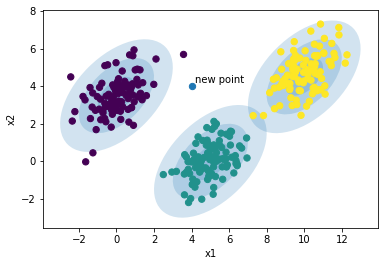

array([1, 2, 3])

300

100

,x,y,label
214,9.406451,5.287349,3
89,-0.045574,2.972289,1
42,1.156544,4.066365,1
205,10.458817,5.158991,3
273,8.417945,2.804565,3


x_new


array([4., 4.])

In [2]:
%run simulated_plda_data.ipynb

X = df[['x','y']].values
N = X.shape[0]
y = df.label

df.label.unique()

X1 = df.loc[df.label ==1,['x','y']].values
nk = X1.shape[0]

N
nk

df.sample(5).head(5)

print('x_new')
x_new

### Learning the parameters (train)

In [25]:
def estimate_gaussian_parameters(Xk):

    mk = np.mean(Xk,axis=0)
    Sk = np.cov(Xk[:,0],Xk[:,1])
    
    return mk, Sk

def get_plda_paramaters(Xk,N):
    
    Nk = Xk.shape[0]
    
    pik = Nk/N
    
    mk, Sk = estimate_gaussian_parameters(Xk)
    
    Sk_inv = np.linalg.inv(Sk)
    
    return Sk_inv, pik

def compute_scatter_matrixes(X,y,nk):
    
    d = X.shape[1]
    N = X.shape[0]
    
    m = np.mean(X,axis=0)
    
    Sw = np.zeros((d,d))
    Sb = np.zeros((d,d))
    
    labels = np.unique(y)
    
    for label in labels:
        
        # Stop working with new versions of numpy and python
        # Xk = np.squeeze(X[np.argwhere(y == label)])
        Xk =  np.squeeze(X[y == label])
        mk, Sk = estimate_gaussian_parameters(Xk)
        
        # within spread matrix
        Sw = np.add(Sw,(nk -1)*Sk/N)
        
        # between spread matrix
        dmk = np.add(mk,-m)
        dmk = dmk[np.newaxis].transpose()

        Sb = np.add(Sb, nk/N*np.matmul(dmk, dmk.transpose()))
    
    return Sw, Sb
    
def diagnolize_matrix(M, W):
    
    M_diag = np.matmul(W.T,np.matmul(M,W))
    M_diag = np.diag(M_diag.diagonal())
    
    return M_diag
    
def compute_transformation_matrix(Sw,Sb,nk):
    
    #Sw_inv = np.linalg.inv(Sw)
    d = Sw.shape[0]
     
    #S = np.matmul(Sw_inv, Sb)

    # Solves the generalized eigenvalue problem:
    # Av = \lambda Bv where B is positive definite (numpy eigh does not have this constraint).
    # But I understood that \Phi_w is positive definte n Phi_b semi positive definite and
    # not Sw !?
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html
    # Wtih numpy eigh is not working 
    eigenvalues, W = eigh(Sb, Sw)
        
    # projected/diagnolized within spread matrix: projecting Sw
    Lambda_w = diagnolize_matrix(Sw,W)
  
    weight = nk/(nk - 1)
    
    Lambda_w_weighted = weight*Lambda_w
    # prevent small negative numbers due to numerical error
    Lambda_w_weighted[np.isclose(Lambda_w_weighted, 0.0)] = 0.0
    Lambda_w_weighted = np.sqrt(Lambda_w_weighted)
    
    W_transposed_inv = np.linalg.inv(W).T
    
    A = np.matmul(W_transposed_inv, Lambda_w_weighted)
    
    return A, W

def compute_transformed_between_covariance(Lambda_w,Lambda_b,nk):
    
    weight = (nk - 1)/nk
    
    with np.errstate(divide='ignore', invalid='ignore'):
         Psi_diagonal = weight * Lambda_b.diagonal() / Lambda_w.diagonal()

    Psi_diagonal[np.isnan(Psi_diagonal)] = 0.0
    Psi_diagonal = Psi_diagonal - 1.0/nk
    
    # max(0, Psi)
    Psi_diagonal[Psi_diagonal < 0.0] = 0.0
    
    Psi_diagonal[np.isinf(Psi_diagonal)] = 0.0
    Psi = np.diag(Psi_diagonal)

    return Psi

def plda_fit(X, y):
   
    N = X.shape[0]
    K = np.size(np.unique(y))
    labels = np.unique(y)
    nk = int(N/K)
    
    global_mean = np.mean(X,axis=0)
    
    Sw, Sb = compute_scatter_matrixes(X,y,nk)
    
    A, W = compute_transformation_matrix(Sw,Sb,nk)
    
    Lambda_w = diagnolize_matrix(Sw,W)
    Lambda_b = diagnolize_matrix(Sb,W)
   
    # The within trasnformed covariance is Identity matrix
    Psi = compute_transformed_between_covariance(Lambda_w,Lambda_b,nk)
   
    return global_mean, A, Psi

def project_data(z, M_inv,global_mean):
    
    z_transformed = np.matmul(M_inv,(z - global_mean).T)
    
    return z_transformed

In [26]:
# The 3 learned parameters
m, A, Psi = plda_fit(X, y)

m
A
Psi

array([5.0072, 2.743 ])

array([[-0.4136, -0.8596],
       [-0.9947, -0.0258]])

array([[ 3.8165,  0.    ],
       [ 0.    , 21.5167]])

* **Checking the properties of the learned parameter (Matrix: Psi and A)**

In [27]:
Sw,Sb = compute_scatter_matrixes(X,y,nk)

# Phi_w = A*A^t
Phi_w = np.matmul(A,A.T)
print('Phiw vs Sw')
print('# Phi_w = n/(n-1)S_w')
Phi_w 
(nk/(nk -1)*Sw)

# Phi_b = A*Psi*A^t
Phi_b = np.matmul(A,np.matmul(Psi,A.T))
print('Phib vs Sb')
print('# Phi_b = S_b - 1/(n-1)S_w')
Phi_b 
Sb - 1.0/(nk-1)*Sw

print('Total covariance')
print('#Phi_t = Phi_w + Phi_b')
# numpy cov divide by (N-1) instead of N

Xl = X - m

Phi_t = (N-1)*np.cov(Xl[:,0],Xl[:,1])/N

Phi_t
(Phi_b + Phi_w)

Phiw vs Sw
# Phi_w = n/(n-1)S_w


array([[0.91  , 0.4336],
       [0.4336, 0.9901]])

array([[0.91  , 0.4336],
       [0.4336, 0.9901]])

Phib vs Sb
# Phi_b = S_b - 1/(n-1)S_w


array([[16.5515,  2.0474],
       [ 2.0474,  3.7906]])

array([[16.5515,  2.0474],
       [ 2.0474,  3.7906]])

Total covariance
#Phi_t = Phi_w + Phi_b


array([[17.4614,  2.481 ],
       [ 2.481 ,  4.7807]])

array([[17.4614,  2.481 ],
       [ 2.481 ,  4.7807]])

* **Get the project space**

doucble check projections properties 

* Estimate tranformed centroids using 2 different methods  

* $A$ and $W^T$ leads to the same tranfiormation and have the same eigenvectors 

In [33]:
_, W = compute_transformation_matrix(Sw,Sb,nk)

A_inv =  np.linalg.inv(A)
U = project_data(X,A_inv,m)

# for each classes estimate the centroid of the class
c = list()
vc = list()

for k in range(3):
    k0 = int(k*nk)
    kf = int((k0 + 1)*nk - 1)

    c.append(Xl[k0:kf].mean(axis=0))
    vc.append(U.T[k0:kf].mean(axis=0))

c = np.matrix(c)
vc = np.matrix(vc)

V = project_data(c + m,A_inv,m)

print('Comparing the trasnformed centroids estimations: vc == V.T')
V.T
vc

print('W n A properties')
print('W^T n A^{-1} leads to the same transformation')
# Numerical error
np.matmul(W.T,(x_new - m))
np.matmul(A_inv,(x_new - m))

print('W^T n A have the same eigenvectors')
_, ev1 = np.linalg.eig(W.T)
_, ev2 = np.linalg.eig(A)

ev1
ev2

Comparing the trasnformed centroids estimations: vc == V.T


matrix([[-0.8803,  6.2123],
        [ 0.4426, -3.1083],
        [-1.8272, -4.9265]])

matrix([[-0.8803,  6.2123],
        [ 0.4426, -3.1083],
        [-1.8272, -4.9265]])

W n A properties
W^T n A^{-1} leads to the same transformation


array([-1.317 ,  1.8114])

array([-1.3104,  1.8023])

W^T n A have the same eigenvectors


array([[-0.7531,  0.6025],
       [-0.6579, -0.7981]])

array([[-0.7531,  0.6025],
       [-0.6579, -0.7981]])

* **The transformed total covariance can be obtained by transforming the original total covariance matrix**

In [34]:
Psi_t = (N-1)*np.cov(U[0,:],U[1,:])/N

A_t_inv = np.linalg.inv(A.T)

print('# Psi_t = A^{-1} Phi_t A^{-T}, where Phi_t = Phi_w + Phi_b ')
Psi_t 
np.matmul(np.matmul(A_inv,Phi_t),A_t_inv)


# Psi_t = A^{-1} Phi_t A^{-T}, where Phi_t = Phi_w + Phi_b 


array([[4.8165e+00, 1.8948e-15],
       [1.8948e-15, 2.2517e+01]])

array([[4.8165e+00, 2.7344e-15],
       [2.4176e-15, 2.2517e+01]])

### FIXME: Predict

**TODO: See later why the centroid og the 3rd cluster is outside of the cluster** The others are ok. Smells like a simple bug in the filter apply to X to get Xk.

In [37]:
def plda_predict(X_new,X, y,A_inv, Psi, nk):
    
    I = np.identity(Psi.shape[0]).diagonal()
    
    global_mean = np.mean(X,axis=0)
    
    # u' = A^{-1}(x - m)
    U_new = project_data(X_new,A_inv,global_mean)
     
    prob_max = -np.Infinity
    label_max = -1
    labels = np.unique(y)
    
    Psi_diag = Psi.diagonal()
    
    for label in labels:
        
        #print('label: {}'.format(label))
        
        # Stop working with new versions of numpy and python
        # Xk = np.squeeze(X[np.argwhere(y == label)])
        Xk =  np.squeeze(X[y == label])
        
        #print(Xk.shape)
        #print('mk: {}'.format(Xk.mean(axis=0)))
        
        U_g = project_data(Xk,A_inv,global_mean)
        U_g = U_g.T
        #print(U_g.shape)
        
        u_g_mean = U_g.mean(axis=0)
        #print(u_g_mean.shape)
      
        with np.errstate(divide='ignore', invalid='ignore'):
            
            mu_g = nk*Psi_diag/(nk*Psi_diag + I)
            mu_g = np.diag(mu_g)
            mu_g = np.matmul(mu_g,u_g_mean)
            
            #print('mu_g')
            #print(mu_g)
            #print(mu_g.shape)
  
        
            Sg = I + Psi_diag/(nk*Psi_diag + I)
            Sg = np.diag(Sg)
            
            #print('Sg')
            #print(Sg)
            #print(Sg.shape)
        
        m_normal = multivariate_normal(mean=mu_g, cov=Sg)
        
#         print('U_new')
#         print(U_new)
        prob = m_normal.pdf(U_new)
        
        #print('prob: {}'.format(prob))
        
        if prob > prob_max:
            prob_max = prob
            label_max = label
        
    return label_max, prob_max

In [38]:
x_new
X.shape
y.unique()

A_inv = np.linalg.inv(A)

y_new, prob = plda_predict(x_new, X, y, A_inv, Psi, nk)

print('New label: {} with probability: {}'.format(y_new,prob))

array([4., 4.])

(300, 2)

array([1, 2, 3])

New label: 1 with probability: 9.427702518234954e-06


300

(2, 300)

(2, 3)

Transform the new point


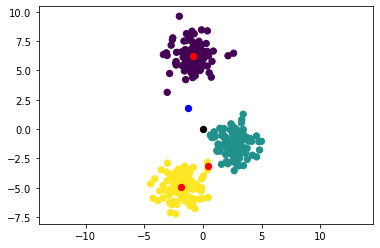

In [42]:
U_labels = ([1] * nk) + ([2] * nk) + ([3] * nk)


len(U_labels)
U.shape
V.shape

# plot matrix is bug in matplotlib
V = np.array(V)

print('Transform the new point')
U_new = project_data(x_new,A_inv,m)

ax = plt.gca()
_ = ax.scatter(U[0,:], U[1, :], c=U_labels, s=40, cmap='viridis', zorder=2)
_ = ax.scatter(V[0,:], V[1, :],c='red', s=40, cmap='viridis', zorder=2)
_ = ax.scatter(0, 0, c='black', s=40, cmap='viridis', zorder=2)
_ = ax.scatter(U_new[0],U_new[1], c='blue', s=40, cmap='viridis', zorder=2)
_ = ax.axis('equal')

### TODO: Hypotesis test

**TODO**

**I still do not understand this and I do not know how to implement and how to test**


### Comparing with PCA and Fisher LDA

In [80]:
#label = np.unique(y)
label_dict = {1: '1', 2: '2', 3:'3'}
y.shape
np.unique(y)

def plot_pca(X,title):

    ax = plt.subplot(111)

    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        #print('label: ', label)
        plt.scatter(x=X[:,0][y == label+1],
                y=X[:,1][y == label+1],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label+1]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    #plt.axis('equal')
    plt.xlim((-9,9))
    plt.ylim((-9,9))

    leg = plt.legend(loc='upper left', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid()

    plt.show()
    
def plot_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):
        
        #print(label)
        plt.scatter(x=X[:,0][y == label + 1],
                    y=X[:,1][y == label + 1] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label+1])

    plt.xlabel('LD1')
    plt.ylabel('LD2')
    #plt.axis('equal')
    plt.xlim((-9,9))
    plt.ylim((-9,9))

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()
    
def plot_plda(X,title):

    ax = plt.subplot(111)

    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        #print('label: ', label)
        plt.scatter(x=X[:,0][y == label+1],
                y=X[:,1][y == label+1],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label+1]
                )

    plt.xlabel('u1')
    plt.ylabel('u2')
    #plt.axis('equal')
    plt.xlim((-9,9))
    plt.ylim((-9,9))

    leg = plt.legend(loc='upper left', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid()

    plt.show()

(300,)

array([1, 2, 3])

In [78]:
# LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(Xl, y).transform(Xl)

## PCA See no need to use labels
pca = sklearnPCA(n_components=2)
X_pca = pca.fit_transform(Xl)

/home/leandroohf/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


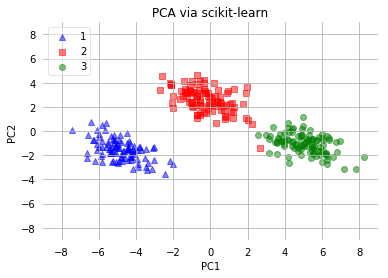

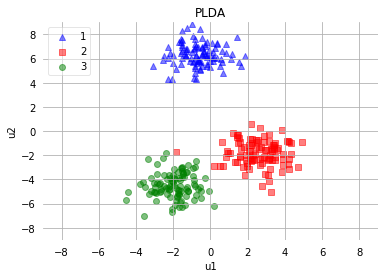

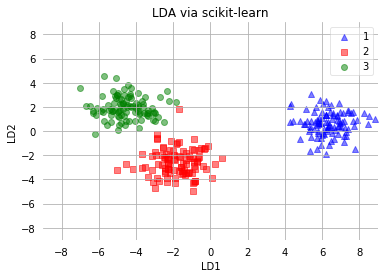

In [83]:
plot_pca(X_pca,title='PCA via scikit-learn')

# projection with more discriminative power than PCA
plot_plda(U.T, title='PLDA')

# Same projection but rotate by 90 degrees
plot_lda(X_lda, title='LDA via scikit-learn')